# Curso de Métodos Numéricos (DEMAT)
# Tarea 2

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Agosto 24, 2023**     |
| Fecha límite de entrega de la tarea: | **Septiembre 3, 2023**  |

## Indicaciones

El propósito de esta tarea es poner en praćtica lo que hemos revisado
sobre Python, por lo que los ejercicios son de programación.

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo para los valores que devuelve una función.
Pueden codificar como gusten la manera en que regresa los cálculos.
El punto es que podamos tener acceso a los resultados,
sin usar variables globales, y que la función no sólo imprima
los valores que después no los podamos usar.


----

## Ejercicio 1 (2 puntos)

Importar la librería de Numpy.
En esta librería están definidas las funciones `sum()` y `prod()`
que calculan la suma y el producto de los elementos de un arreglo.


In [36]:
import numpy as np

v = np.random.randn(5)
print('v=', v)
print('Suma de los elementos de v:', np.sum(v))
print('Producto de los elementos de v:', np.prod(v))


v= [ 0.85522658  1.18016297 -1.96022729 -0.95577165  0.03959438]
Suma de los elementos de v: -0.8410150025285946
Producto de los elementos de v: 0.07487163685402816


---

Defina una función que reciba como argumento un arreglo de numpy $v$.

La función debe devolver
- el valor de la media aritmética $m_a$,
- el valor de la media geométrica $m_g$, y
- el valor de la media armónica $m_h$
de los elementos de $v = (v_1, v_2, ..., v_n)$:

$$ m_a = \frac{1}{n} \sum_{i=1}^n v_i $$

$$ m_h = n \left( \sum_{i=1}^n \frac{1}{v_i} \right)^{-1} $$

$$ m_g = \left( \prod_{i=1}^n v_i \right)^{1/n} $$


Muestre los valores que devuelve la función con los arreglos que
se indican en la siguiente celda.

### Solución:

In [37]:
# Esta celda es para escribir el código de la función o importarla de un archivo
def means(v: np.ndarray):
  assert len(v) > 0, "No empty array"
  assert all(el != 0 for el in v), "All elements should be different of zero"
  ma = np.sum(v)/len(v)
  mh = len(v)/(np.sum(1/v))
  mg = np.float_power(np.prod(v), 1/len(v))
  return ma, mh, mg



In [38]:
# Arreglos para probar la función
v1 = np.array([5, 8, 4, 10, 22, 14])
v2 = np.linspace(1, 5, 10)
v3 = np.log(v2)

print(means(v1))

print(means(v2))

# means(v3)


(10.5, 7.576875768757689, 8.887476182161876)
(3.0, 2.3495586830928072, 2.6862591168550023)


In [39]:
print(means(v3))

AssertionError: ignored

Podemos notar que se genera un error, esto es debido a que `v2` tiene un 1,
por lo cual `log(v2)` tiene un cero y por tanto no se puede dividir por el.

_

```







```

---

## Ejercicio 2 (3 puntos)

Programe la función que devuelve el épsilon de la máquina $\epsilon_m$
siguiendo el algoritmo visto en clase:

```
epsilon = 0.5;
unidad  = 1.0;
valor   = unidad + epsilon;
while valor > unidad,
    epsilon = epsilon/2;
    valor   = unidad + epsilon;
end
epsilon = epsilon*2;
```

Haga lo siguiente:

- Imprimir el valor del épsilon de la máquina.
- Imprima la diferencia entre ese valor y np.finfo(float).eps para
  verificar que son iguales.
- Para cada una de las filas de la siguiente tabla, asigne los
  valores en cada columna a las variables $x_1$ y $x_2$.
  Imprima como cadenas de caracteres los dos valores que se
  se van a comparar y la cadena "Iguales" si $x_1$ y $x_2$ son
  iguales o la cadena "Diferentes" en caso contrario.
  Por ejemplo, para la primera fila de la tabla se debe imprimir
  
```
 1+epsilon   1    Diferentes
```


$$ \begin{array}{|r|r|}  \hline
   x_1 & x_2 \\ \hline
   1+\epsilon_m     &  1  \\
   \epsilon_m/2     &  0  \\
   1+\epsilon_m/2   &  1  \\
   1-\epsilon_m/2   &  1  \\
   1-\epsilon_m/4   &  1  \\
   1-\epsilon_m/2   &  1-\epsilon_m \\
   \epsilon_m^2     &  0  \\
   \epsilon_m^5     &  0  \\
   \epsilon_m+\epsilon_m^2  &  \epsilon_m  \\
   \epsilon_m-\epsilon_m^3  &  \epsilon_m  \\  \hline
\end{array} $$

### Solución:

In [19]:
# Esta celda es para escribir el código de la función o importarla de un archivo
def epsilon():
  epsilon = 0.5;
  unidad  = 1.0;
  valor   = unidad + epsilon;
  while valor > unidad:
      epsilon = epsilon/2;
      valor   = unidad + epsilon;

  return epsilon*2;


In [40]:

print(f"El epsilon de la maquina es: {epsilon()}")
print(f"La diferencia entre epsilon() y np.finfo(float).eps es: {np.finfo(float).eps - epsilon()}")
print()
eps = epsilon()
compara = lambda a, b: "Iguales" if a == b else "Diferentes"
x1 = [1+eps, eps/2, 1 + eps/2, 1-eps/2, 1-eps/4, 1-eps/2, eps**2, eps**5, eps + eps**2, eps-eps**3]
x2 = [1, 0, 1, 1, 1, 1-eps, 0, 0, eps, eps]
x1_s = ['1+epsilon_m','epsilon_m/2', '1+epsilon_m/2', '1-epsilon_m/2',
        '1-epsilon_m/4', '1-epsilon_m/2', 'epsilon_m^2', 'epsilon_m^5',
        'epsilon_m + epsilon_m^2', 'epsilon_m epsilon_m-epsilon_m^3']
x2_s = x2 = [1, 0, 1, 1, 1, '1-epsilon', 0, 0, 'epssilon', 'epsilon']
print('\n'.join(f"{a}    {b}  {compara(c, d)}" for (a, b, c, d) in zip(x1_s, x2_s, x1, x2)))


El epsilon de la maquina es: 2.220446049250313e-16
La diferencia entre epsilon() y np.finfo(float).eps es: 0.0

1+epsilon_m    1  Diferentes
epsilon_m/2    0  Diferentes
1+epsilon_m/2    1  Iguales
1-epsilon_m/2    1  Diferentes
1-epsilon_m/4    1  Iguales
1-epsilon_m/2    1-epsilon  Diferentes
epsilon_m^2    0  Diferentes
epsilon_m^5    0  Diferentes
epsilon_m + epsilon_m^2    epssilon  Diferentes
epsilon_m epsilon_m-epsilon_m^3    epsilon  Diferentes


_

```







```

---



## Ejercicio 2 (3 puntos)

Supongamos que una computadora tiene 8 dígitos para representar la
parte fraccionaria de un número de punto flotante.

- Calcule el valor del épsilon de la máquina.
- Dé la represención en notación científica
  (la mantisa en base 2, multiplicada por 2 elevada al exponente
  correspondiente)  del número 5.
- Dé la representación en notación científica del número
  consecutivo a 5 en la computadora.
- Escriba el valor de la distancia $d_c$ entre 5 y su consecutivo.
- Exprese $d_c$ en términos del épsilon de la máquina.
- Tenemos que el consecutivo de 5 lo podemos expresar como $5 + d_c$.
  Si tenemos un número real $x \in (5,5+d_c)$, entonces
  la representación en la computadora de $x$ es $fl(x)=5$ o
  $fl(x)=5+d_c$. Escriba una cota para el error relativo
  
$$    \left|\frac{fl(x) - x}{x}\right|  $$

  para las dos posibles representaciones de $x$.


### Solución:


- En este caso tenemos que $p=8$, por lo que
  $$ e_m = 2^{-p} = 2^{-8} = 0.00390625$$
- Notemos que $5$ en base $2$ es $5_2 = 101$, ademas es positivo, por lo que
  buscamos $d_1, d_2, …, d_8$ y $k$ tal que
  $$ (1.d_1d_2⋯d_8)_2⋅2^k = (101)_2,$$
  es decir queremos que se cumpla:
  $$
    \left(1 + \sum_{i=1}^8 \frac{d_i}{2^i}  \right) \cdot 2^k = 2^k +  \sum_{i=1}^8 d_i⋅2^{k-i} = 1 + 2^2,
  $$
  de lo anterior, al comparar los exponentes,
  podemos notar que $k=2$, y por tanto se debe cumplir que
  $$
   2^2 + d_1 2^1 + d_22^0 + d_32^{-1} + ⋯ + d_82^{-6} = 1 + 2^2,
  $$
  y de manera similar, al comparar coeficientes tenemos que $d_2 = 1$, $d_1 = d_3 = d_4 = ⋯ = d_8 = 0$.
  Por lo que la representacion cientifica de $5$ es: $(1.01)_2 \cdot 2^2$.
- Por el inciso anterior tenemos que $5 = (1.01000000)_2 \cdot 2^2$, entonces el
  siguiente numero representable es $5 + d_c = (1.01000001)_2 \cdot 2^2$
- De lo anterior tenemos que $d_c = (0.00000001)_2\cdot 2^2 = 2^{-8} \cdot 2^2$
- Entonces tenemos que $d_c = 4\cdot e_m$
- Dado que $x\in (5, 5 +d_c)$ podemos suponer que $x = (1.01000000d_1d_2…)_2⋅2^2$.
  Primero veamos el caso $fl(x) = 5 = (1.01) \cdot 2^2$, entonces se cumple que
  $$
  \begin{aligned}
    |fñ(x) - x| &= (1.01000000d_1d_2…)_2⋅2^2 - (1.01000000)_2 \cdot 2^2 \\
                &= (0.00000000d_1d_2…)_2⋅2^2 = (0.d_1d_2…)_2⋅2^2⋅2^{-8}\\
                & \leqslant 2^{-6},
  \end{aligned}            
  $$
  por lo cual tenemos que
  $$
    \left|\frac{fl(x) - x}{x}\right| \le \frac{2^{-6}}{(1.01000000d_1d_2…)_2⋅2^2} \le \frac{2^{-6}}{2^2} = 2^{-8} = e_m.
  $$
  Para el caso $fl(x) = 5 +d_c$ supondremos que es porque $x$ está más cerca de
  $5+d_c$ que de $5$, entonces se debe cumplir que
  $$
    |fl(x) - x| \le \frac{1}{2} (5+d_c - 5) = \frac{1}{2}d_c = \frac{1}{2}4e_m = 2e_m,
  $$
  lo cual implica que
  $$
    \left|\frac{fl(x) - x}{x}\right| \le \frac{2e_m}{(1.01000000d_1d_2…)_2⋅2^2}\le \frac{2e_m}{2^2} = \frac{e_m}{2}.
  $$



_

```







```

---

## Ejercicio 4 (2 puntos)

Escriba una función que grafique una elipse. La función recibe los parámetros
- las longitudes $a$ y $b$ de los ejes de la elipse
- las coordenadas $(c_x, c_y)$ del centro de la elipse
- el número de puntos $n$ sobre la elipse

Haga que la función genere una partición $\mathbf{\theta}=\{\theta_1, ..., \theta_n\}$ de $n$ puntos del intervalo $[0, \pi]$.

Calcule un arreglo con las abscisas $\mathbf{x}=\{x_1, ..., x_n\}$ y
un arreglo con las ordenadas $\mathbf{y}=\{y_1, ..., y_n\}$ de puntos sobre la elipse usando
la representación paramétrica

$$ x_i = a\cos\theta_i + c_x $$
$$ y_i = b\sin\theta_i + c_y $$

Usado los arreglos  $\mathbf{x}$ y $\mathbf{y}$ grafique la elipse.

Muestre los resultados de la función con las siguientes combinaciones de parámetros:
1. $a=4, b=4, c=(1,2), n=3$
2. $a=4, b=4, c=(1,2), n=50$
2. $a=5, b=2, c=(-4,2), n=50$

**Nota:** Puede revisar las notas de la ayudantía 1 sobre generación de gráficas
con la librería  `matplotlib`.

### Solución:

In [41]:
# Esta celda es para escribir el código de la función o importarla de un archivo
import matplotlib.pyplot as plt

def elipse(ax, a, b, c, n):
  """Draw an ellipse"""
  theta = np.linspace(0, 2*np.pi, 2*n)
  x = a*np.cos(theta) + c[0]
  y = b*np.sin(theta) + c[1]
  ax.set_xlabel('Eje X')
  ax.set_ylabel('Eje Y')
  ax.set_title('Elipses')
  out = ax.plot(x, y)
  return out



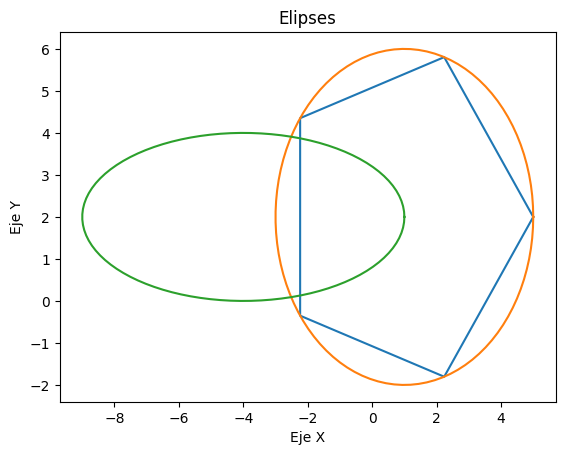

In [43]:
# Pruebas de la función

fig, ax = plt.subplots()

elipse(ax, 4, 4, (1, 2), 3)
elipse(ax, 4, 4, (1, 2), 50)
elipse(ax, 5, 2, (-4, 2), 50)

plt.show(fig)


En lugar de solo particionar $[0, π]$ particionamos $[0, 2π]$ para obtener la
elipse completa.